In [1]:
import glob
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
no_smile = glob.glob("../input/smiling-or-not-face-data/non_smile/*.jpg")
smile = glob.glob("../input/smiling-or-not-face-data/smile/*.jpg")
test = glob.glob("../input/smiling-or-not-face-data/test/*.jpg")

In [3]:
X=[]
y=[]
test_data = []
for i in no_smile:
    X_i = Image.open(i)
    X_i = np.array(X_i.resize((32,32)))/255
    X.append(X_i)
    y.append("no smile")
    
for i in smile:
    X_i = Image.open(i)
    X_i = np.array(X_i.resize((32,32)))/255
    X.append(X_i)
    y.append("smile")
    
for i in test:
    X_i = Image.open(i)
    X_i = np.array(X_i.resize((32,32)))/255
    test_data.append(X_i)

In [4]:
X = np.array(X)
y = np.array(y)
test = np.array(test)
from sklearn.utils import shuffle
X,y = shuffle(X,y,random_state=0)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=45)

In [7]:
#X_train = X_train.reshape(962,32,32,3)
#X_train = X_train.astype("float32")/255
#X_test = X_test.reshape(241,32,32,3)
#X_test = X_test.astype("float32")/255

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
callback = EarlyStopping(patience=60)

In [10]:
model = Sequential([Conv2D(128,(3,3),activation="relu",input_shape= X_train.shape[1:]),
                    MaxPooling2D((2,2)),
                    Dropout(0.3),
                    BatchNormalization(),
                    Conv2D(64,(3,3),activation="relu"),
                    MaxPooling2D((2,2)),
                    Conv2D(64,(3,3),activation="relu"),
                    Flatten(),
                    Dense(128,activation="relu"),
                    Dropout(0.1),
                    BatchNormalization(),
                    Dense(128,activation="relu"),
                    Dense(1,activation="sigmoid")])
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

In [11]:
train_hist = model.fit(X_train,y_train,epochs=80,batch_size=8,callbacks=[callback],validation_split=0.1)

Epoch 1/80
95/95 [==============================] - 11s 8ms/step - loss: 0.5609 - accuracy: 0.7001 - val_loss: 0.6884 - val_accuracy: 0.4941
Epoch 2/80
95/95 [==============================] - 0s 5ms/step - loss: 0.3824 - accuracy: 0.8375 - val_loss: 0.8130 - val_accuracy: 0.4941
Epoch 3/80
95/95 [==============================] - 0s 5ms/step - loss: 0.3551 - accuracy: 0.8520 - val_loss: 0.7875 - val_accuracy: 0.5059
Epoch 4/80
95/95 [==============================] - 0s 5ms/step - loss: 0.3338 - accuracy: 0.8666 - val_loss: 1.2650 - val_accuracy: 0.4941
Epoch 5/80
95/95 [==============================] - 0s 5ms/step - loss: 0.2838 - accuracy: 0.8890 - val_loss: 1.1086 - val_accuracy: 0.5176
Epoch 6/80
95/95 [==============================] - 0s 5ms/step - loss: 0.2364 - accuracy: 0.9022 - val_loss: 1.2169 - val_accuracy: 0.4941
Epoch 7/80
95/95 [==============================] - 0s 5ms/step - loss: 0.2806 - accuracy: 0.8838 - val_loss: 0.3021 - val_accuracy: 0.9176
Epoch 8/80
95/95 [=

In [14]:
import matplotlib.pyplot as plt

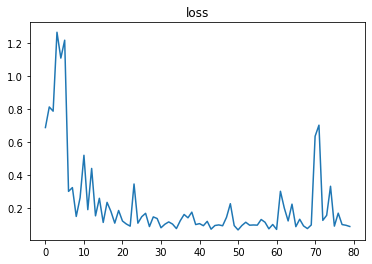

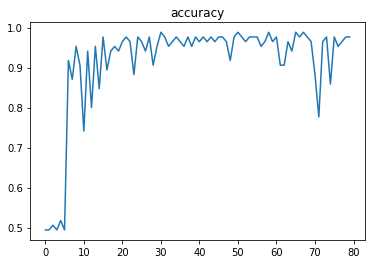

In [16]:
plt.plot(train_hist.history['val_loss'])
plt.title("loss")
plt.show()
plt.plot(train_hist.history['val_accuracy'])
plt.title("accuracy")
plt.show()